# Setup
## Install Dependencies

```
pip install ctoybox 
pip install matplotlib # used in this notebook; not necessary!
```

## Import Packages

In [1]:
from ctoybox import Toybox, Input
import numpy as np
import json

from matplotlib.pyplot import imshow, subplots, tight_layout
%matplotlib inline

# Inspect Breakout

We create an instance of Toybox's Breakout implementation here in a with-block. This block ensures that all memory gets released when finished (in case you don't want to wait for the object to be deleted by python!)

We use ``matplotlib``'s ``imshow`` to look at the color image of the very first frame. But nothing happens until we press the FIRE button to get a ball.

lives: 5, score: 0, game_over?: False


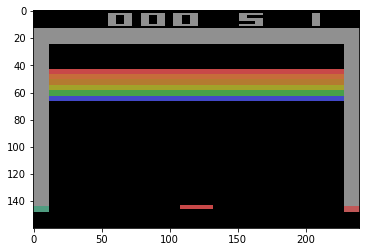

In [2]:
with Toybox("breakout") as tb:
    print('lives: {}, score: {}, game_over?: {}'.format(
        tb.get_lives(), tb.get_score(), tb.game_over()))
    imshow(tb.get_rgb_frame())

# Explore Breakout over time:

First, we use the ``Input`` struct to create actions ``fire`` and ``noop`` to send to the game.

Then, we send ``fire`` once, and ``noop`` 60 times. We save a frame image every 20 frames.

Finally, we use ``imshow`` with ``np.hstack`` to show all images at once!

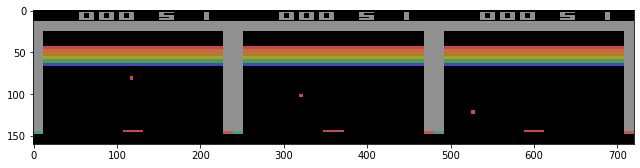

In [7]:
# Construct our two actions: fire & nothing
fire = Input()
fire.button1 = True
noop = Input()

# We will collect rendered frames in this variable.
frames = []
with Toybox('breakout') as tb:
    tb.apply_action(fire) # fire to get first ball!
    frames.append(tb.get_rgb_frame())
    
    # see what happens over time!
    for i in range(60):
        tb.apply_action(noop)
        if i % 20 == 0 and i > 0:
            frames.append(tb.get_rgb_frame())

# render the images we collected horizontally:
subplots(figsize=(len(frames)*3, 4))
imshow(np.hstack(frames))
tight_layout() # makes it a little bigger.

# What next?

Basic interaction with the API allows for the sending of images, and inspection of lives, score, and game_over. This is enough to build a simple gym wrapper if you want to start training RL agents. This core ``ctoybox`` package does not provide one because it should not depend on gym.

For more code, checkout our experimentation / main repository: [toybox-rs/Toybox](https://github.com/toybox-rs/Toybox) which uses a fork of openai/baselines to run some experiments and tests.